<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Ignore deprecation error in sns.distplo()
'''
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="seaborn") 
'''

'\nimport warnings\nwarnings.filterwarnings("ignore", category=DeprecationWarning, module="seaborn") \n'

#### Read the dataset in the csv file from the URL


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset
- The following describes the dataset variables:
    - ·      CRIM - per capita crime rate by town
    - ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - ·      INDUS - proportion of non-retail business acres per town.
    - ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - ·      NOX - nitric oxides concentration (parts per 10 million)
    - ·      RM - average number of rooms per dwelling
    - ·      AGE - proportion of owner-occupied units built prior to 1940
    - ·      DIS - weighted distances to five Boston employment centres
    - ·      RAD - index of accessibility to radial highways
    - ·      TAX - full-value property-tax rate per \$10,000
    - ·      PTRATIO - pupil-teacher ratio by town
    - ·      LSTAT - % lower status of the population
    - ·      MEDV - Median value of owner-occupied homes in $1000's

### Exploratory Data Analysis

In [4]:
# Check the dataset shape
#len(boston_df)
boston_df.shape

(506, 14)

In [5]:
#Check column names
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# Remove 1st column, "Unnamed: 0"
boston_df = boston_df.drop(boston_df.columns[0], axis=1)
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# Check the head part
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# Check the tail part
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [9]:
# Check statical summary of the dataset
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


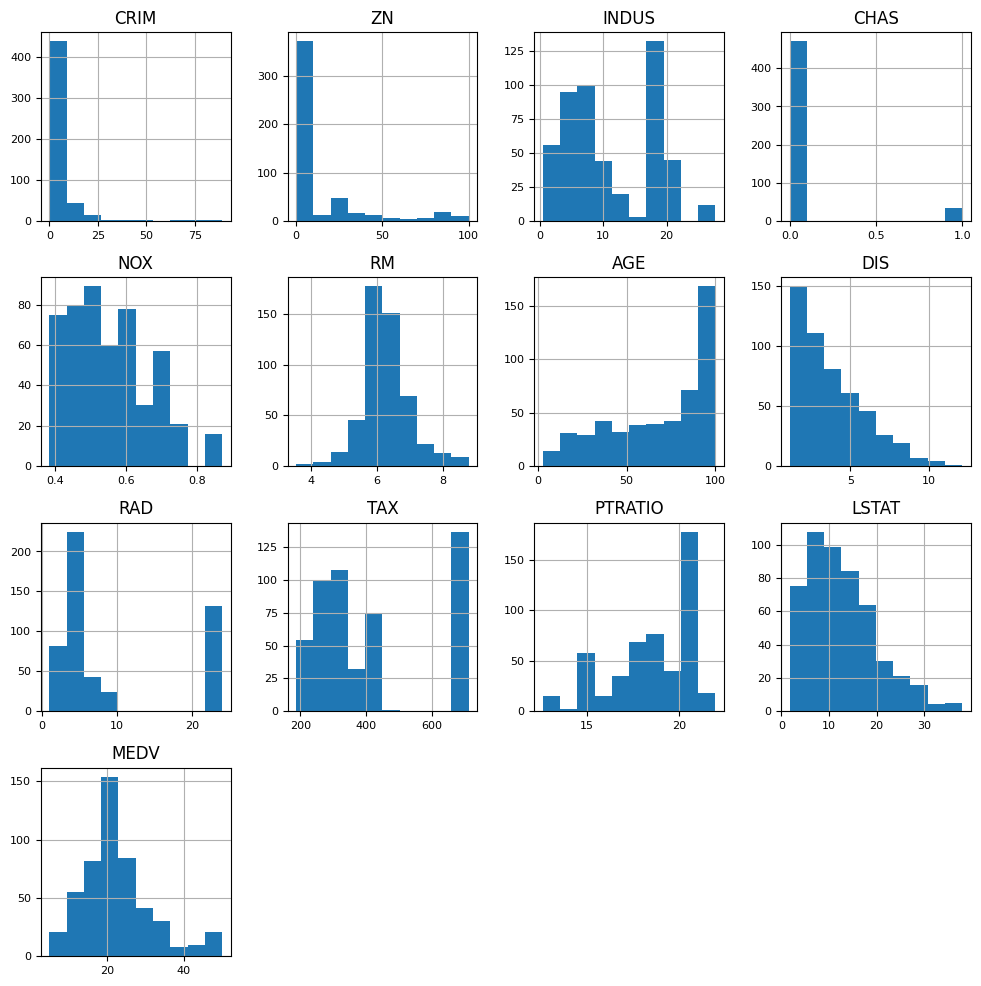

In [10]:
# Check histgram
boston_df.hist(figsize=(12,12), xlabelsize=8, ylabelsize=8)
plt.show()   # just to suppress unwanted messages

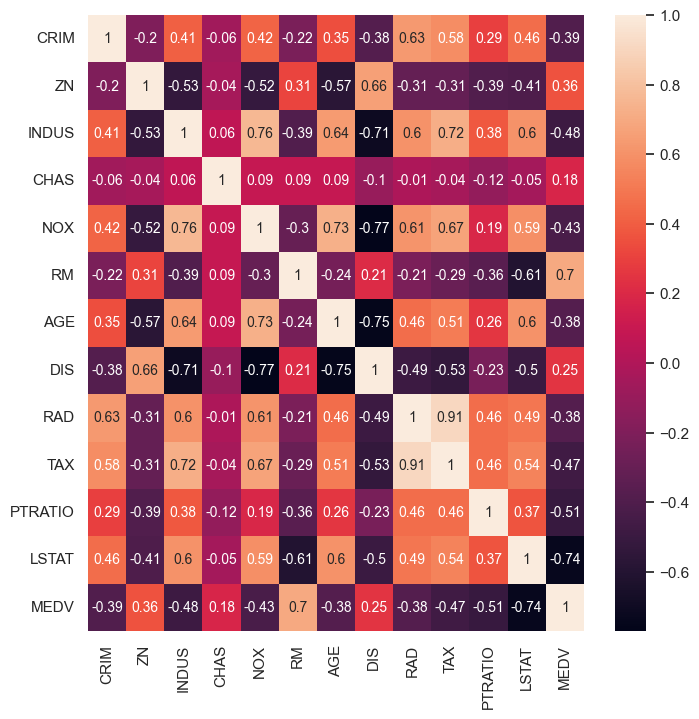

In [11]:
# Check correlation heatmap
corr_matrix = boston_df.corr().round(2)
sns.set(style="whitegrid", rc={"figure.figsize":(8, 8)})
sns.heatmap(data=corr_matrix, annot=True, annot_kws={"size": 10})
plt.show()   # just to suppress unwanted messages

## Task 2: Generate Descriptive Statistics and Visualizations
- For all visualizations, please include a title in each graph and appropriate labels
- Generate the following and explain your findings:
    - 2-1) For the "Median value of owner-occupied homes" provide a boxplot
    - 2-2) Provide a  bar plot for the Charles river variable
    - 2-3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
    - 2-4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
    - 2-5) Create a histogram for the pupil to teacher ratio variable
- Cf. Week3

#### 2-1) For the "Median value of owner-occupied homes" provide a boxplot

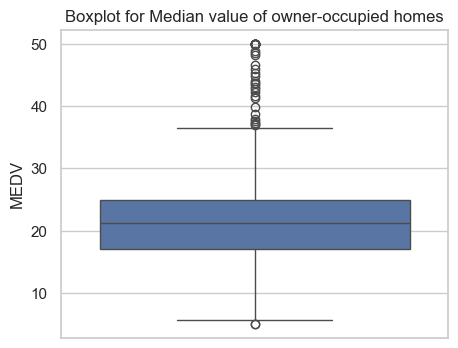

In [12]:
sns.set(style="whitegrid", rc={"figure.figsize":(5, 4)})

ax = sns.boxplot(y='MEDV', data=boston_df).set(title='Boxplot for Median value of owner-occupied homes')

#### 2-2) Provide a  bar plot for the Charles river variable

[0. 1.]


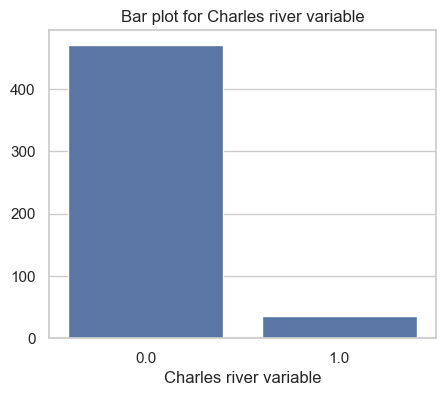

In [13]:
# This shows that CHAS takes 2 values only
print(boston_df['CHAS'].unique())

# Culculate counts of CHAS's 2 values
chas_count = boston_df['CHAS'].value_counts()

sns.set(style="whitegrid", rc={"figure.figsize":(5, 4)})

ax = sns.barplot(x=chas_count.index, y=chas_count.values).set(title='Bar plot for Charles river variable', xlabel='Charles river variable')

#### 2-3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
# Discretize AGE into 3 groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
# or boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

#print(boston_df.head())

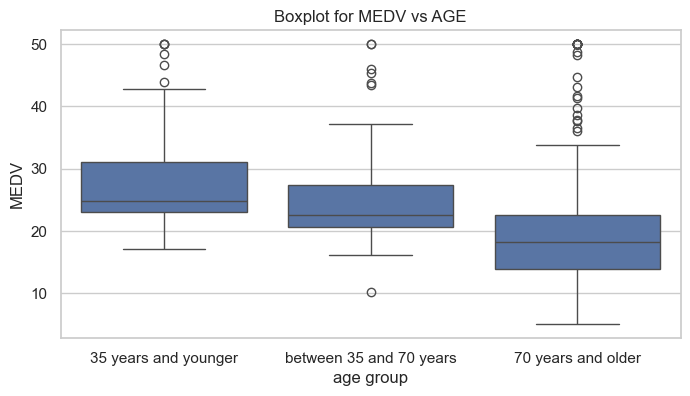

In [15]:
#print(boston_df.groupby(['age_group'])['AGE'].mean())
flag_order = boston_df.groupby(['age_group'])['AGE'].mean().sort_values(ascending=True)

sns.set(style="whitegrid", rc={"figure.figsize":(8, 4)})

sns.boxplot(x='age_group', y='MEDV', order=flag_order.index, data=boston_df).set(title='Boxplot for MEDV vs AGE', xlabel='age group', ylabel='MEDV')
plt.show()   # just to suppress unwanted messages

#### 2-4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

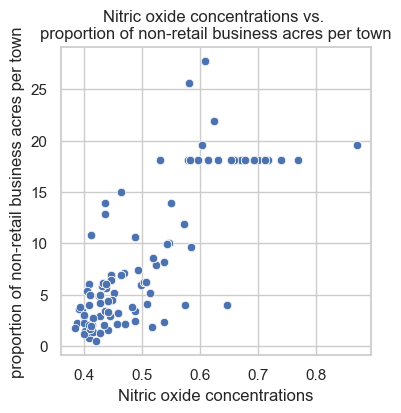

In [16]:
s_NOX = 'Nitric oxide concentrations'
s_INDUS = 'proportion of non-retail business acres per town'

sns.set(style="whitegrid", rc={"figure.figsize":(4, 4)})

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title=s_NOX + ' vs. \n' + s_INDUS,\
                                                             xlabel = s_NOX, ylabel = s_INDUS)

#### 2-5) Create a histogram for the pupil to teacher ratio variable

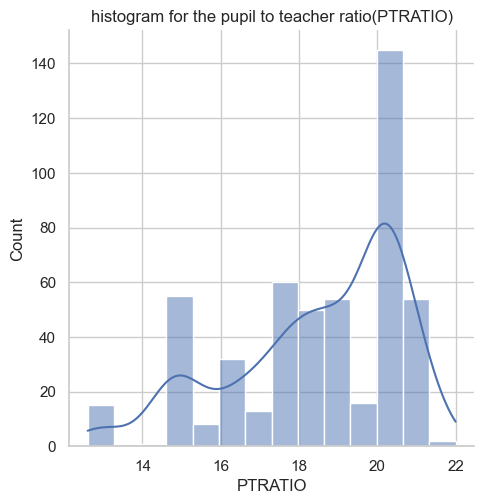

In [17]:
sns.set(style="whitegrid", rc={"figure.figsize":(4, 4)})

# kde(Kernel Density Distribution)
#ax = sns.distplot(boston_df['PTRATIO'], kde = True).set(title='histogram for the pupil to teacher ratio(PTRATIO)')    # distplot() is depricated.
ax = sns.displot(boston_df['PTRATIO'], kde = True).set(title='histogram for the pupil to teacher ratio(PTRATIO)') 
# or ax = sns.histplot(boston_df['PTRATIO'], kde = True).set(title='histogram for the pupil to teacher ratio(PTRATIO)')

## Task 3: Use the appropriate tests to answer the questions provided.

- For each of the following questions;
    - 3-1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
    - 3-2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    - 3-3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
    - 3-4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
- Be sure to:
    - a) State your hypothesis.
    - b) Use α = 0.05
    - c) Perform the test Statistics.
    - d) State the conclusion from the test.

### 3-1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [18]:
from IPython.display import display, HTML, Markdown

h_0 = "there is no significant difference in median value of houses bounded by the Charles river or not"
h_1 = "there is a significant difference in median value of houses bounded by the Charles river or not"

s_hypothesis = "**HYPOTHESIS:**" + "\n"\
+ "* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: " + h_0 + "\n"\
+ "* $H_1$($H_a$) (Alternative hypothesis): " + h_1
display(Markdown(s_hypothesis))

**HYPOTHESIS:**
* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: there is no significant difference in median value of houses bounded by the Charles river or not
* $H_1$($H_a$) (Alternative hypothesis): there is a significant difference in median value of houses bounded by the Charles river or not

In [19]:
statistic, pvalue = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                          boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)
print(f"statistic: {statistic:.4f}\t" f"p-value: {pvalue:.4f}")

statistic: 3.9964	p-value: 0.0001


In [20]:
from IPython.display import display, HTML, Markdown

alpha = 0.05

s_conclusion = "**CONCLUSION**: " + "<br>"
# Hypothesis testing
if pvalue < alpha:
    s_conclusion = s_conclusion\
    + "Since the p-value is less than α value " + str(alpha) + ", we reject the null hypothesis"\
    + "<br>as there is enough proof that " + h_1
else:
    s_conclusion = s_conclusion\
    + "Since the p-value is greater than α value " + str(alpha) + ", we fail to reject the null hypothesis"\
    + "<br>as there is no enough proof that " + h_1
display(Markdown(s_conclusion))

**CONCLUSION**: <br>Since the p-value is less than α value 0.05, we reject the null hypothesis<br>as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river or not

#### 3-2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [21]:
from IPython.display import display, HTML, Markdown

h_0 = "There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)"
h_1 = "There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)"

s_hypothesis = "**HYPOTHESIS:**" + "\n"\
+ "* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: " + h_0 + "\n"\
+ "* $H_1$($H_a$) (Alternative hypothesis): " + h_1
display(Markdown(s_hypothesis))

**HYPOTHESIS:**
* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
* $H_1$($H_a$) (Alternative hypothesis): There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [22]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

'''
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['eval'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['eval'], 
                   center='mean')

LeveneResult(statistic=np.float64(3.820237661494229), pvalue=np.float64(0.02262141852021939))
'''

younger_age_group_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
middle_age_group_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older_age_group_MEDV = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
statistic, pvalue = scipy.stats.f_oneway(younger_age_group_MEDV, middle_age_group_MEDV, older_age_group_MEDV)
print(f"statistic: {statistic:.4f}\t" f"p-value: {pvalue:.4f}")

statistic: 36.4076	p-value: 0.0000


In [23]:
from IPython.display import display, HTML, Markdown

alpha = 0.05

s_conclusion = "**CONCLUSION**: " + "<br>"
# Hypothesis testing
if pvalue < alpha:
    s_conclusion = s_conclusion\
    + "Since the p-value is less than α value " + str(alpha) + ", we reject the null hypothesis"\
    + "<br>as there is enough proof that " + h_1
else:
    s_conclusion = s_conclusion\
    + "Since the p-value is greater than α value " + str(alpha) + ", we fail to reject the null hypothesis"\
    + "<br>as there is no enough proof that " + h_1
display(Markdown(s_conclusion))

**CONCLUSION**: <br>Since the p-value is less than α value 0.05, we reject the null hypothesis<br>as there is enough proof that There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

### 3-3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [25]:
from IPython.display import display, HTML, Markdown

what = "relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
h_0 = "there is no significant " + what
h_1 = "there is a significant " + what

s_hypothesis = "**HYPOTHESIS:**" + "\n"\
+ "* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: " + h_0 + "\n"\
+ "* $H_1$($H_a$) (Alternative hypothesis): " + h_1
display(Markdown(s_hypothesis))

**HYPOTHESIS:**
* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: there is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* $H_1$($H_a$) (Alternative hypothesis): there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

- Since NOX & INDUS are both continuous variables, we can use a pearson correlation test and draw a scatter plot

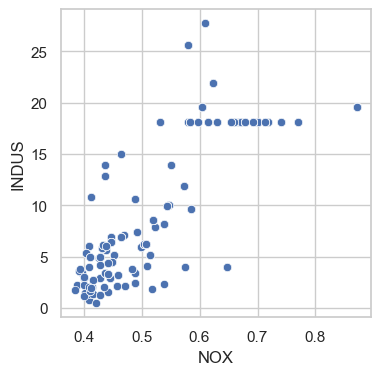

In [26]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [27]:
statistic, pvalue = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"statistic: {statistic:.4f}")
print(f"p-value: {pvalue:.4f}")

statistic: 0.7637
p-value: 0.0000


In [28]:
from IPython.display import display, HTML, Markdown

alpha = 0.05

s_conclusion = "**CONCLUSION**: " + "<br>"
# Hypothesis testing
if pvalue < alpha:
    s_conclusion = s_conclusion\
    + "Since the p-value is less than α value " + str(alpha) + ", we reject the null hypothesis"\
    + "<br>as there is enough proof that " + h_1
else:
    s_conclusion = s_conclusion\
    + "Since the p-value is greater than α value " + str(alpha) + ", we fail to reject the null hypothesis"\
    + "<br>as there is no enough proof that " + h_1
display(Markdown(s_conclusion))

**CONCLUSION**: <br>Since the p-value is less than α value 0.05, we reject the null hypothesis<br>as there is enough proof that there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### 3-4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [29]:
from IPython.display import display, HTML, Markdown

what = "relationship between an additional weighted distance to the five Boston employment centres and the median value of owner occupied homes"
h_0 = "there is no significant " + what
h_1 = "there is a significant " + what

s_hypothesis = "**HYPOTHESIS:**" + "\n"\
+ "* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: " + h_0 + "\n"\
+ "* $H_1$($H_a$) (Alternative hypothesis): " + h_1
display(Markdown(s_hypothesis))

**HYPOTHESIS:**
* $H_0$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(NULL hypothesis)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: there is no significant relationship between an additional weighted distance to the five Boston employment centres and the median value of owner occupied homes
* $H_1$($H_a$) (Alternative hypothesis): there is a significant relationship between an additional weighted distance to the five Boston employment centres and the median value of owner occupied homes

In [30]:
statistic0, pvalue0 = scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])
print("cf. Pearson correlation test")
print(f"statistic: {statistic0}")
print(f"p-value: {pvalue0}")

cf. Pearson correlation test
statistic: 0.24992873408590394
p-value: 1.2066117273371133e-08


In [31]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
#print(model.summary())

import math

statistic = math.sqrt(model.rsquared)
pvalue = model.pvalues.iloc[1]
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")

statistic: 0.24992873408590413
p-value: 1.2066117273371883e-08


In [32]:
from IPython.display import display, HTML, Markdown

alpha = 0.05

s_conclusion = "**CONCLUSION**: " + "<br>"
# Hypothesis testing
if pvalue < alpha:
    s_conclusion = s_conclusion\
    + "Since the p-value is less than α value " + str(alpha) + ", we reject the null hypothesis"\
    + "<br>as there is enough proof that " + h_1
else:
    s_conclusion = s_conclusion\
    + "Since the p-value is greater than α value " + str(alpha) + ", we fail to reject the null hypothesis"\
    + "<br>as there is no enough proof that " + h_1
display(Markdown(s_conclusion))

**CONCLUSION**: <br>Since the p-value is less than α value 0.05, we reject the null hypothesis<br>as there is enough proof that there is a significant relationship between an additional weighted distance to the five Boston employment centres and the median value of owner occupied homes